In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score,roc_curve,confusion_matrix

In [ ]:
# Load the hotel bookings dataset
df_hotel = pd.read_csv("hotel_bookings.csv")
df_hotel.head()

FileNotFoundError: [Errno 2] No such file or directory: 'hotel_bookings.csv'

In [ ]:
df_hotel.shape

(119390, 32)

In [ ]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df_hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df_hotel['is_canceled'].value_counts()

,count
is_canceled,
0,75166
1,44224


In [ ]:
df_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Check for missing values
df_hotel.isnull().sum().sort_values(ascending=False)

,0
company,112593
agent,16340
country,488
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


In [ ]:
# Drop columns that are not useful for analysis
df_hotel_cleaned = df_hotel.drop(
    columns=[
        'reservation_status',
          'reservation_status_date',
          'agent',
          'company'
          ]
    )
df_hotel_cleaned.shape

(119390, 28)

In [ ]:
# Handle missing values
df_hotel_cleaned['children']= df_hotel_cleaned['children'].fillna(0)
df_hotel_cleaned['country']= df_hotel_cleaned['country'].fillna('Unknown')

df_hotel_cleaned.isnull().sum().sort_values(ascending=False)

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
# Convert arrival month names to numeric values
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df_hotel_cleaned['arrival_date_month'] = df_hotel_cleaned['arrival_date_month'].map(month_map)

df_hotel_cleaned[['arrival_date_month']].head()

,arrival_date_month
0,7
1,7
2,7
3,7
4,7


In [ ]:
# Verify no missing values in 'arrival_date_month'
df_hotel_cleaned['arrival_date_month'].isnull().sum()


np.int64(0)

In [ ]:
df_hotel_cleaned['arrival_date_month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

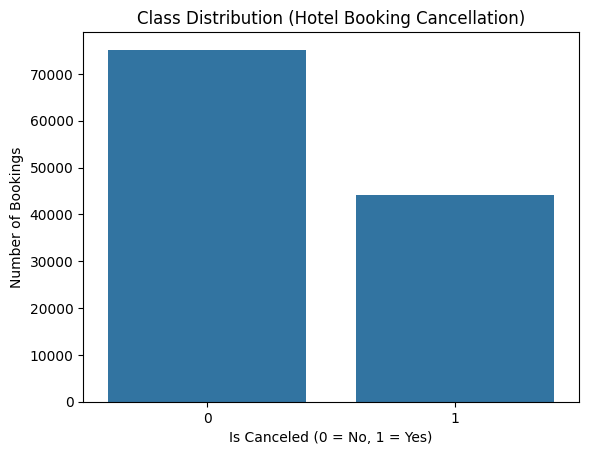

In [ ]:
#class distribution
sns.countplot(x='is_canceled', data=df_hotel_cleaned)
plt.title("Class Distribution (Hotel Booking Cancellation)")
plt.xlabel("Is Canceled (0 = No, 1 = Yes)")
plt.ylabel("Number of Bookings")
plt.show()


In [ ]:
# Define numerical features
numerical_features=[
    'lead_time','adr',
    'stays_in_week_nights','stays_in_weekend_nights',
    'previous_cancellations','booking_changes',
    'days_in_waiting_list','total_of_special_requests'
]

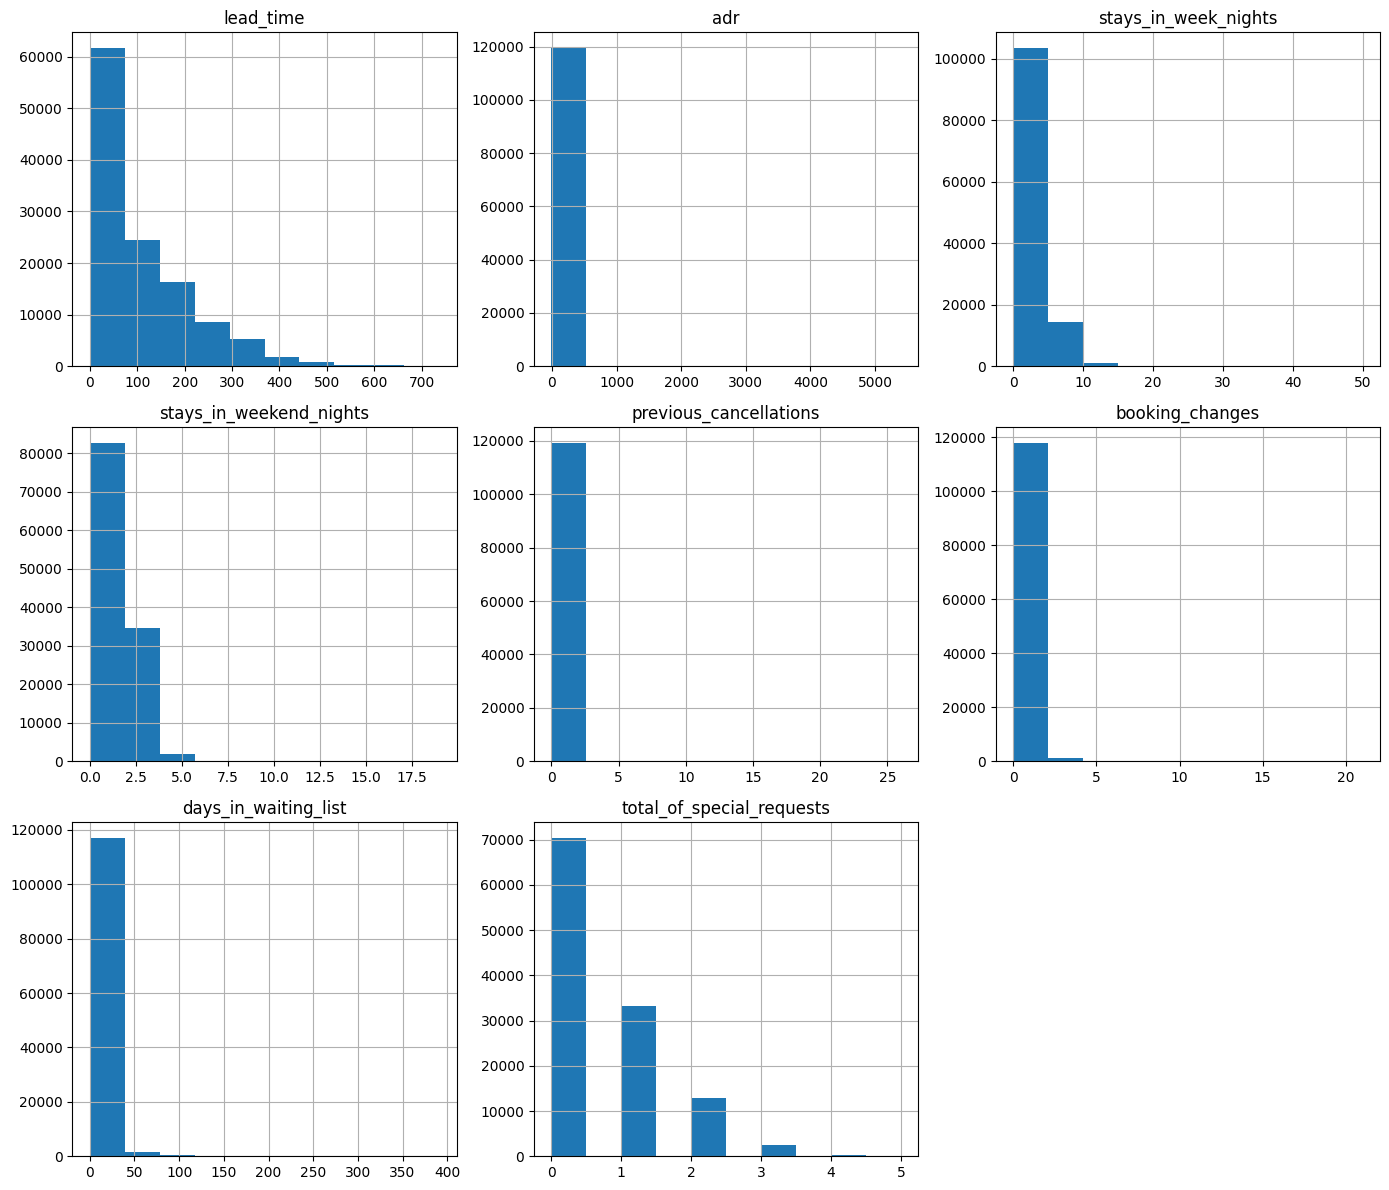

In [ ]:
# Plot histograms for numerical features
df_hotel_cleaned[numerical_features].hist(figsize=(14,12))
plt.tight_layout()
plt.show()

In [ ]:
# Correlation of numeric features with the target
corr_with_target = df_hotel_cleaned[numerical_features + ['is_canceled']].corr()['is_canceled'] \
    .drop('is_canceled') \
    .sort_values(ascending=False)

print("Correlation with target (is_canceled):")
print(corr_with_target)


Correlation with target (is_canceled):
lead_time                    0.293123
previous_cancellations       0.110133
days_in_waiting_list         0.054186
adr                          0.047557
stays_in_week_nights         0.024765
stays_in_weekend_nights     -0.001791
booking_changes             -0.144381
total_of_special_requests   -0.234658
Name: is_canceled, dtype: float64


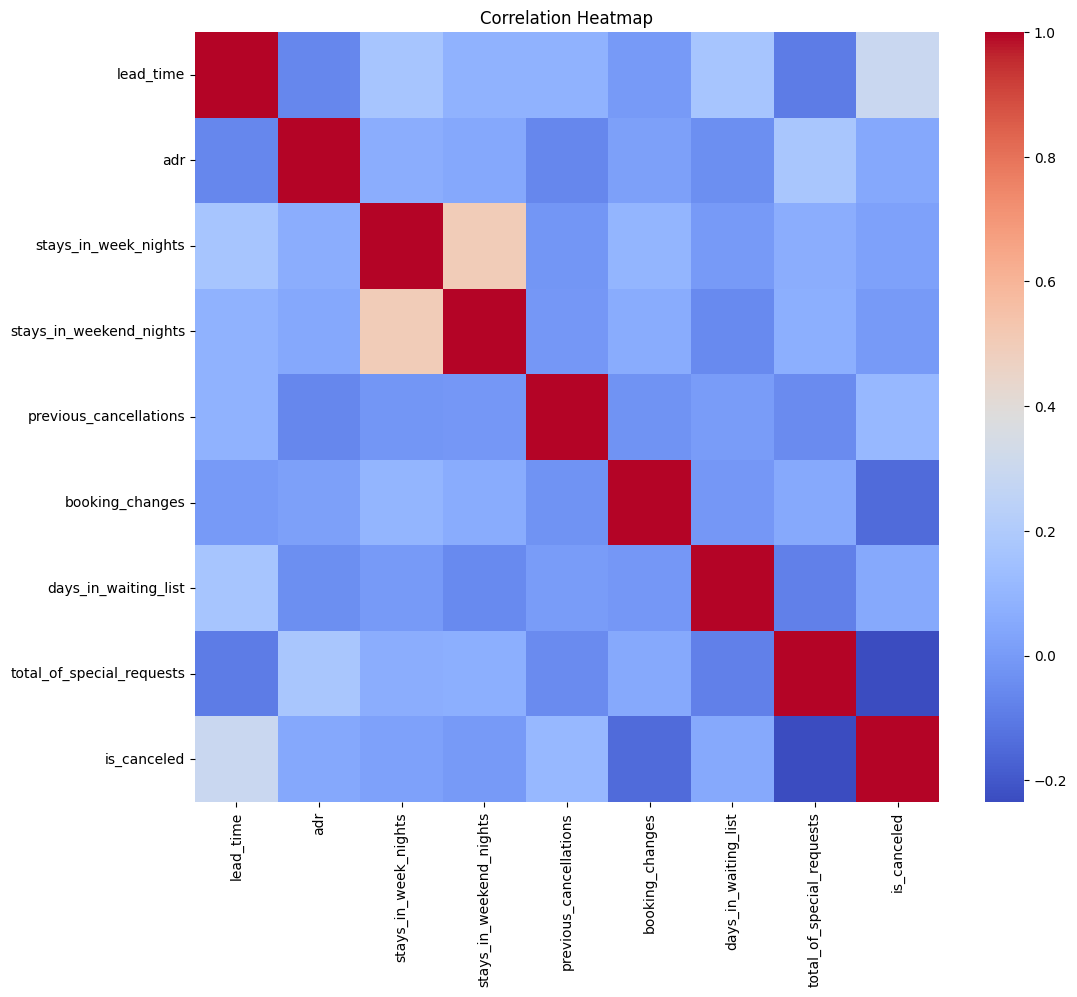

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(
    df_hotel_cleaned[numerical_features + ['is_canceled']].corr(),
    cmap='coolwarm',
    annot=False
)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#Seperate features and target variable
y=df_hotel_cleaned['is_canceled']
X=df_hotel_cleaned.drop(columns=['is_canceled'])

In [ ]:
#identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

print('categorical features:',list(categorical_features))
print('numerical features:',list(numerical_features))

categorical features: ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']
numerical features: ['lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [ ]:
#one-hot encode categorical features
x_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

print('Encoded feature shape:', x_encoded.shape)

Encoded feature shape: (119390, 236)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(
    x_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train/Test_split

In [ ]:
print('Training set shape:', X_train.shape,'Test set shape:', X_test.shape)
print('Train Class balance:\n', y_train.value_counts(normalize=True))
print('Test Class balance:\n', y_test.value_counts(normalize=True))

Training set shape: (95512, 236) Test set shape: (23878, 236)
Train Class balance:
 is_canceled
0    0.629586
1    0.370414
Name: proportion, dtype: float64
Test Class balance:
 is_canceled
0    0.629575
1    0.370425
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Numeric features:", numerical_features)
print("Categorical features:", categorical_features)

Numeric features: Index(['lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')
Categorical features: Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
nb = BernoulliNB()
model = nb

In [ ]:
from sklearn.model_selection import cross_val_score

cv_nb = cross_val_score(
    nb,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='roc_auc'
)

cv_nb.mean(), cv_nb.std()


(np.float64(0.8461799751490396), np.float64(0.0035351330716023957))

In [ ]:
# ---- 6) Fit ----
model.fit(X_train, y_train)

BernoulliNB()

In [ ]:
# ---- 7) Evaluate ----
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print("Test Accuracy:", acc)
print("Test ROC-AUC :", roc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.7875869000753832
Test ROC-AUC : 0.8457027890816575

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84     15033
           1       0.80      0.57      0.66      8845

    accuracy                           0.79     23878
   macro avg       0.79      0.74      0.75     23878
weighted avg       0.79      0.79      0.78     23878



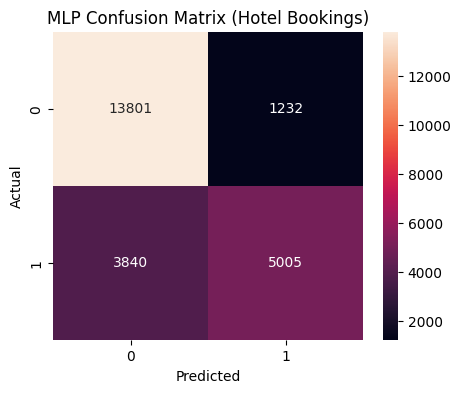

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("MLP Confusion Matrix (Hotel Bookings)")
plt.show()


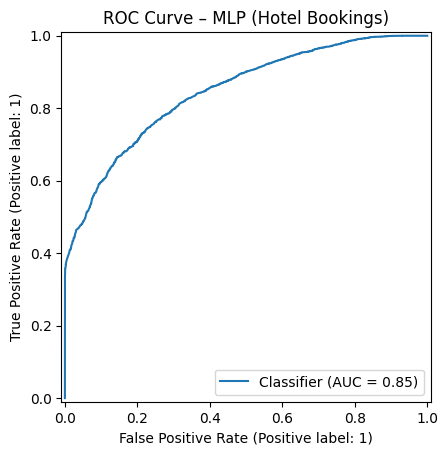

In [ ]:
# ROC curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve – MLP (Hotel Bookings)")
plt.show()

In [ ]:
# ---- 8) Overfitting check (train vs test) ----
train_pred = model.predict(X_train)
train_proba = model.predict_proba(X_train)[:, 1]
train_acc = accuracy_score(y_train, train_pred)
train_roc = roc_auc_score(y_train, train_proba)

print("Train Accuracy:", train_acc)
print("Train ROC-AUC :", train_roc)

Train Accuracy: 0.7845820420470726
Train ROC-AUC : 0.8443982927078701


In [ ]:
# ---- 9) Cross-validation (leakage-safe) ----
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, x_encoded, y, cv=cv, scoring="roc_auc")
print("CV ROC-AUC mean:", cv_scores.mean())
print("CV ROC-AUC std :", cv_scores.std())

CV ROC-AUC mean: 0.8438133393734544
CV ROC-AUC std : 0.002097899668852585
